<center>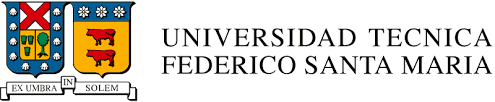</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 INTRODUCCIÓN AL APRENDIZAJE AUTOMÁTICO - 2023-1 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, imputación de datos y preprocesamientos
* Feature Engineering
* Regresión
* Clasificación
* Regularización
* SVM


**Formalidades**  
* Equipos de trabajo de 3 personas (*Los estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Las preguntas que deben responder se encuentran especificadas explícitamente con letras, ejemplo a) b) c), por lo tanto cualquier pregunta que se encuentre incompleta será penalizada con descuento del puntaje. Recuerde que los códigos presentes en este documento son solo una guía de referencia, por lo tanto no necesariamente funcionan, usted debe mostrar todos sus conocimientos aprendidos a lo largo de la carrera para que su código funcione como se espera. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico de los ayudantes (<sebastian.sanchezl@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>). Especificar el siguiente asunto: [INF-398-2023-1 Tarea 1]. Invitar como colaborador a los usuarios de github "ssanchezl" para poder acceder al repositorio en caso de ser privado.

* Fecha de presentaciones 12 de Mayo, en horario de clases.
* Fecha de entrega: 13 de Mayo. Hora límite de entrega: 12:00 p.m. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>

Importe las librerías necesarias para cargar explorar el conjunto de datos.

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif



# 1. Regresión lineal para la predicción de la demanda de bicicletas compartidas en Seúl

La regresión lineal es un modelo matemático que pertenece al aprendizaje supervisado, el cual intenta aplicar relaciones que predigan el resultado de un evento basándose en los datos de variables independientes. Llamaremos a este resultado: variable objetivo o _target_, y como es un modelo de regresión lineal la variable objetivo es una variable continua.

<center><img src=https://t4.ftcdn.net/jpg/02/32/47/13/360_F_232471334_vfDHKHeRHtwkn0zvd8SM98THwQeYDn8y.jpg></center>

Los sistemas de bicicletas compartidas son un medio para alquilar bicicletas en el que el proceso de afiliación, alquiler y devolución se automatiza a través de una red de _quioscos o puntos de estacionamiento_ repartidos por toda la ciudad. Gracias a estos sistemas, los usuarios pueden alquilar una bicicleta en un lugar y devolverla en otro cuando lo necesiten.

En esta pregunta se le proporcionan datos de alquiler de la cantidad de bicicletas arrendadas por hora durante dos años según variables climáticas y laborales. 

Usted tiene separar el dataset en un conjunto de entrenamiento y en un conjunto de prueba, y el objetivo de esta pregunta será: **predecir el número total de bicicletas alquiladas en el conjunto de pruebas**.

La base de datos y toda la información asociada a esta se puede encontrar en el siguiente link: https://www.kaggle.com/datasets/saurabhshahane/seoul-bike-sharing-demand-prediction.

## 1.1 Manipulación y exploración del conjunto de datos

Lo primero es obtener los datos, para esto se pueden descargar los archivos directamente de la página de Kaggle a través del link de la descripción de arriba.

Existen distintas formas para obtener los datos, de las cuales usted debe elegir solo uno:

1. Puede descargarlos y guardarlos en su directorio local y luego cargar los datos usando este notebook con Jupyter.

2. Puede utilizar google colab. En este caso existen 2 formas de cargar los datos, montando su cuenta de google drive en el colab y guardar los datos en una carpeta de drive. La otra forma es cargar los datos de forma en la máquiva virtual que le asigna colab de manera **temporal**. Tenga cuidado si elige la forma temporal ya que si por alguna razón se desconecta del ambiente, deberá volver a descargar los datos.

3. Existen muchas otras formas más pero usted puede obtener los datos con cualquier método que estime conveniente.


También es posible descargarlos mediante la [API](https://github.com/Kaggle/kaggle-api#kaggle-api) de Kaggle siguiendo las instrucciones en la sección API credentials. Si desea utilizar google colab puede seguir este tutorial [Kaggle + Colab](https://galhever.medium.com/how-to-import-data-from-kaggle-to-google-colab-8160caa11e2)

Localizar y subir la api-key de kaggle

In [2]:
#from google.colab import files
#files.upload()

Otorgar permisos de lectura y escritura al archivo kaggle.json

In [3]:
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

Descargar el dataset

In [4]:
#!kaggle datasets download -d saurabhshahane/seoul-bike-sharing-demand-prediction

Descomprimir

In [5]:
#!unzip seoul-bike-sharing-demand-prediction.zip

### 1.1.1 Exploración del conjunto de datos




In [6]:
data = pd.read_csv('SeoulBikeData.csv',encoding= 'unicode_escape')

In [7]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Explore el conjunto de datos y responda  brevemente las siguiente preguntas:

> a) ¿Cuáles variables poseen valores numéricos y cuáles poseen valores categóricos?

> b) ¿Qué aspecto tienen en común las variables _Date_ y _Season_?

> c) Revise si faltan valores en los conjuntos de datos de prueba y de entrenamiento.

In [8]:
data.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

a)
-----
#### Las variables que poseen valores numericos son:
- Rented Bike Count
- Hour
- Temperature
- Humidity
- Wind speed
- Visibility
- Drew point temperature
- Solar Radiation (MJ/m2)
- Rainfall(mm)
- Snowfall (cm)
- Date
#### Las variables que poseen valores categoricos:
- Seasons
- Holiday
- Functioning Day


b)
----

 El aspecto en comun de estas variables es el tiempo. La variable Season nos entrega informacion de la estacion del año, que puede ser util para analizar la influencia de las condiciones climaticas en diferentes estaciones del año. Por otro lado, tenemos la variable date que puede ser util para tendencias a lo largo del tiempo.

c)
-----


In [9]:
def datainfo():
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

datainfo()

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Date,object,8760,365,0,0.0
Rented Bike Count,int64,8760,2166,0,0.0
Hour,int64,8760,24,0,0.0
Temperature(°C),float64,8760,546,0,0.0
Humidity(%),int64,8760,90,0,0.0
Wind speed (m/s),float64,8760,65,0,0.0
Visibility (10m),int64,8760,1789,0,0.0
Dew point temperature(°C),float64,8760,556,0,0.0
Solar Radiation (MJ/m2),float64,8760,345,0,0.0
Rainfall(mm),float64,8760,61,0,0.0


> d) ¿Por qué la variable _Functioning Day_ no aporta ningún valor al entrenamiento? Grafique, justifique y elimine la columna.

ESTA PREGUNTA FUE ELIMINADA SEGUN EL AYUDANTE

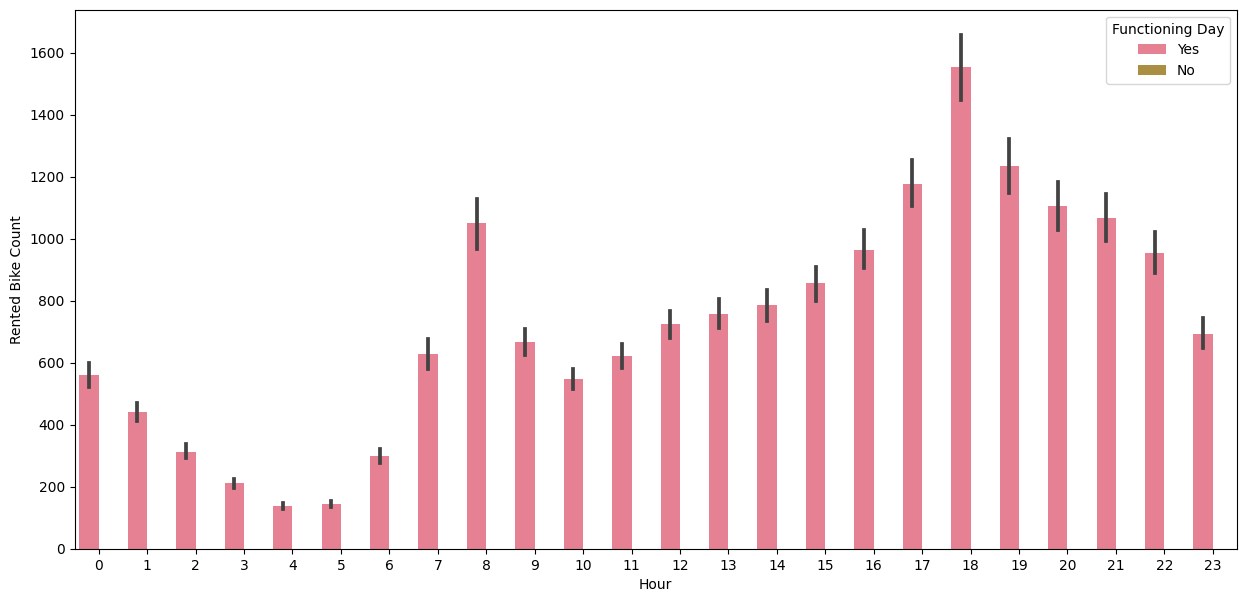

In [10]:
def barplots(x,y,hue):
    plt.figure(figsize=(15,7))
    sns.set_palette("husl")
    sns.barplot(x=x,y=y,hue=hue,data=data);
barplots('Hour','Rented Bike Count','Functioning Day')

In [11]:
#data.drop('Functioning Day', axis=1, inplace=True)

### 1.1.2 Exploración de Features

> a) Revise detalladamente las variables: 'Date', 'Holiday', 'Seasons' y 'Rented Bike Count' del conjunto de datos cuente y grafique su histograma.

Una vez analizado lo anterior responda las siguientes preguntas:

> b) ¿La gente arrienda más bicicletas en vacaciones o en días de trabajo?

> c) ¿Se arriendan más bicicletas los fines de semana o durante la semana?

> d) ¿De qué forma afecta el clima al arriendo de bicicletas?

Para las preguntas b), c) y d) apóyese de los gráficos.




In [12]:
#cat_features = data[['Holiday', 'Seasons', 'Rented Bike Count']]
#for i in cat_features:
#    ax = sns.countplot(x = i, data = data)
#    plt.title(i)
#    """
#    Su código aquí
#    """
#    plt.show()



a) 
---

Para la variable Date, que es continua, sería más apropiado graficar un histograma de frecuencias. Sin embargo, como la variable Date no es categórica ni numérica discreta, sino continua, puede ser más adecuado representarla mediante un gráfico de línea o de puntos que muestre cómo varía el número de bicicletas arrendadas a lo largo del tiempo.

b)
---
Si suponemos que los dias de trabajo son los dias 'No Holiday' y los dias de no trabajo son los dias 'Holiday', entonces tenemos que segun el siguiente grafico, la gente arrienda mas bicicletas en los dias de trabajo.

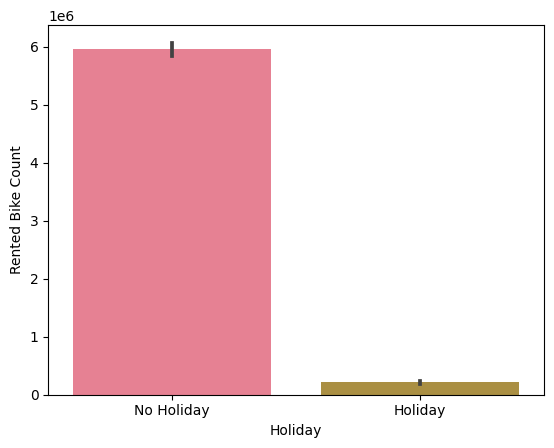

In [13]:
sns.barplot(x='Holiday',y='Rented Bike Count' , data=data , estimator=sum);


In [14]:
data.groupby(by=['Holiday']).sum()

C:\Users\Gerson\AppData\Local\Temp\ipykernel_8924\2829225027.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(by=['Holiday']).sum()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Holiday,,,,,,,,,,
Holiday,215895,4968,4298.3,23212,790.4,657366,106.2,237.49,33.7,22.0
No Holiday,5956419,95772,108556.1,486850,14319.8,11929228,35580.4,4747.92,1268.8,635.6


c)
---
Los dias de semana son de Lunes a Viernes y los Fin de semana son Sabado y Domingo. Entonces hay que graficar un histograma que compare el arriendo de bicicletas en esos dos rangos de dias:

Dia semana:  4506628
Fin de semana:  1665686


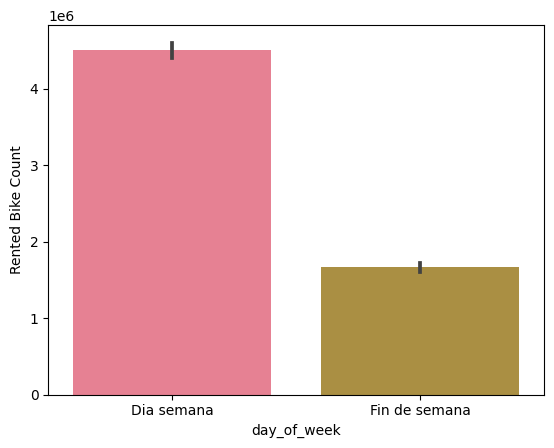

In [15]:
#ax = sns.barplot(data=data, x='Date', y='Rented Bike Count')

def isWeekend(day):
    if(day > 4):
        return "Fin de semana"
    return "Dia semana"

is_wekeend = data[ ['Date', 'Rented Bike Count'] ].copy()
is_wekeend['day_of_week'] =  (pd.to_datetime( is_wekeend['Date'], format="%d/%m/%Y" ).dt.dayofweek).apply( lambda x : isWeekend(x) )
sns.barplot(data=is_wekeend, x='day_of_week', y='Rented Bike Count', estimator=sum)

print("Dia semana: " , is_wekeend[ is_wekeend['day_of_week'] == "Dia semana" ]['Rented Bike Count'].sum()    )
print("Fin de semana: " , is_wekeend[ is_wekeend['day_of_week'] == "Fin de semana" ]['Rented Bike Count'].sum() )




Segun el grafico anterior la gente arrienda mas bicicletas los dias de semana

d)
---
Segun el siguiente grafico, la gente tiende a arrendar mas bicicletas en las estaciones mas calurosas y a disminuir su arriendo en las estaciones mas frias

[Text(0, 0, '487169'),
 Text(0, 0, '1.61191e+06'),
 Text(0, 0, '2.28323e+06'),
 Text(0, 0, '1.79e+06')]

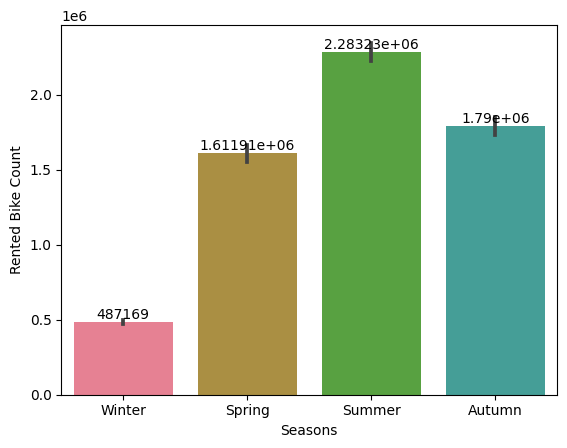

In [16]:
ax = sns.barplot(data=data, x='Seasons', y='Rented Bike Count', estimator=sum)
ax.bar_label(ax.containers[0])

> e) Grafique el promedio de bicicletas arrendadas por estación ('Seasons').

El promedio de bicicletas arrendadas corresponderia a la siguiente visualizacion

[Text(0, 0, '225.541'),
 Text(0, 0, '730.031'),
 Text(0, 0, '1034.07'),
 Text(0, 0, '819.598')]

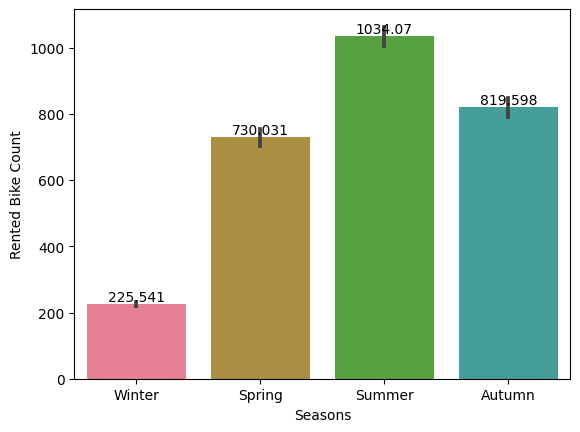

In [17]:
ax = sns.barplot(data=data, x='Seasons', y='Rented Bike Count', estimator='mean')
ax.bar_label(ax.containers[0])

Responda las siguientes preguntas:

> f) ¿Cuáles son las estaciones en las que más se arriendan bicicletas?> g) Transforme la fecha en variables numéricas, es decir, si _Date_ es 01/12/2017, entonces obtenga _Año_=2017, _mes_=12, _día_=1. Agreguelas al dataframe.

Las estaciones que mas arriendan bicicletas estan representadas en orden de mayor a menor en el siguiente listado:
- [Summer, Autumn, Spring, Winter]

Es decir, summer es la estacion con mas arriendos con un total de 2.28323e+06 arriendos

In [18]:
data["Date"] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

> g) Transforme la fecha en variables numéricas, es decir, si _Date_ es 01/12/2017, entonces obtenga _Año_=2017, _mes_=12, _día_=1. Agreguelas al dataframe.

La variable date queda descritas de la siguiente forma:

In [19]:
data['Dia'] = pd.to_datetime(data['Date'], format='%d/%m/%Y').dt.dayofweek
data['Mes'] = pd.to_datetime(data['Date'], format='%d/%m/%Y').dt.month
data['Año'] = pd.to_datetime(data['Date'], format='%d/%m/%Y').dt.year
data[['Dia','Mes','Año','Date']]

,Dia,Mes,Año,Date
0,4,12,2017,2017-12-01
1,4,12,2017,2017-12-01
2,4,12,2017,2017-12-01
3,4,12,2017,2017-12-01
4,4,12,2017,2017-12-01
...,...,...,...,...
8755,4,11,2018,2018-11-30
8756,4,11,2018,2018-11-30
8757,4,11,2018,2018-11-30
8758,4,11,2018,2018-11-30


In [20]:
data.drop('Date', axis=1, inplace=True)

> h) Grafique y analice de forma general la correlación entre las variables **numéricas**. 

C:\Users\Gerson\AppData\Local\Temp\ipykernel_8924\3740921689.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr= data.corr()


<AxesSubplot: >

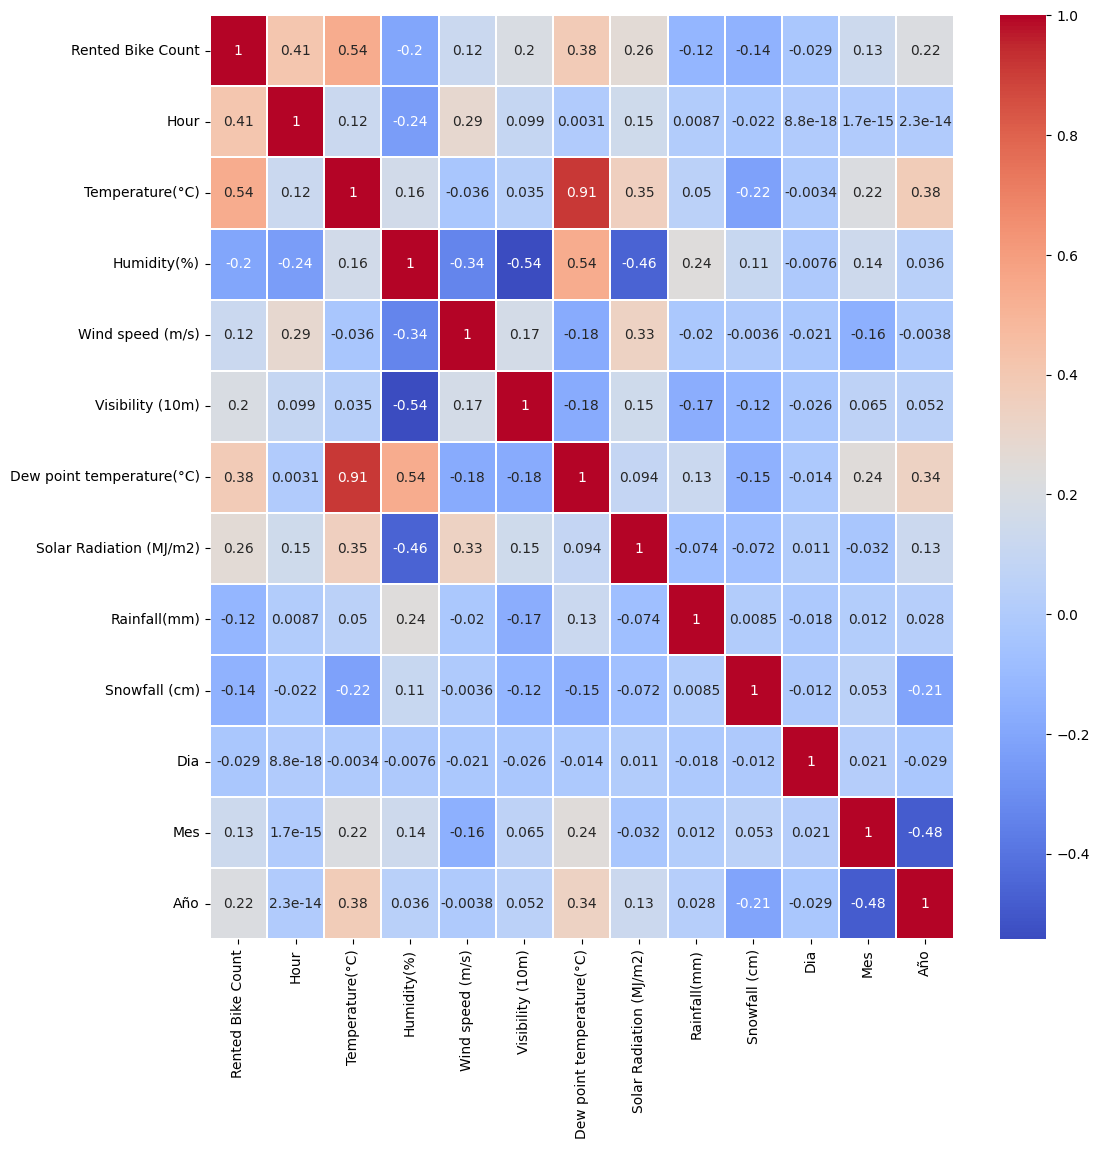

In [21]:
data_corr= data.corr()       
plt.figure(figsize=(12,12))

sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

> i) Escriba sus conclusiones sobre los resultados encontrados en la correlación en la pregunta h)
>
> Una de las correlaciones importantes que se pueden notar es la del numero de bicicletas rentadas y la temperatura, hay una cierta correlacion positiva entre esas dos variables, lo cual puede ser util para implementar estrategias en torno a la venta de bicicletas para cuando se pronostican altas temperaturas. 
> 
> Otra correlacion es la de Visibility y Humidity, con una correlacion negativa. Esta correlacion se puede explicar debido a fenomenos naturales, como la neblina que al fin y al cabo son particulas de agua que estan en el aire (Alta humedad), lo que obstaculizan la vista (Poca visibilidad). Sin embargo, la visibilidad al parecer tiene poco impacto en lo que es el arriendo de bicicletas.

### 1.1.3 Separación de conjuntos

> a) Divida el dataset en features _X_ y target _y_, además divida el dataset en un subconjunto de entrenamiento y otro de prueba.

In [22]:
X=data.drop('Rented Bike Count',axis=1)
y=data['Rented Bike Count']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

> a) ¿Para qué es el parámetro stratify?
>
>  es para que el conjunto de entrenamiento como el conjunto de prueba tengan una proporción similar de observaciones en cada clase.
>  por ejemplo, si la variable y es una variable categórica binaria con valores 0 y 1 y hay un 25% de ceros y un 75% de unos, stratify=y se asegurará de que su división aleatoria tenga un 25% de ceros y un 75% de unos.

> b) Aplique Label Encoding a las variables _Seasons_ y _Holiday_ en el conjunto de entrenamiento y responda para qué sirve y como se usa.

In [24]:
#Se definen las variables categóricas
cat_vars = ["Seasons", "Holiday", "Functioning Day"]

#Se crea un LabelEncoder para cada variable
#Luego se aplica fit_transform a cada conjunto de entrenamiento
le = {}
for cat in cat_vars:
    le[cat] = preprocessing.LabelEncoder()
    X_train[cat] = le[cat].fit_transform(X_train[cat])

In [25]:
X_train["Seasons"] 

2630    1
5907    2
7243    0
1540    3
4643    2
       ..
5713    2
7393    0
688     3
978     3
2261    1
Name: Seasons, Length: 7884, dtype: int32

Label encoder asigna un numero a cada categoria. Esto sirve para los algoritmos de aprendizaje automático que generalmente requieren que las entradas sean numéricas. Para utilizarlo primero se importa la libreria preprocessing, luego se instancia el objeto LabelEncoder() y luego se utiliza fit_transform(columna) en la varibale que queremos transformar. Es importante tener en cuenta que el Label Encoding solo es adecuado para variables categóricas sin orden específico.

> c) Aplique la transformación aprendida por el Label Encoder al conjunto de prueba.

In [26]:
print( X_test["Seasons"].unique() )
print( X_train["Seasons"].unique() )

['Winter' 'Autumn' 'Summer' 'Spring']
[1 2 0 3]


In [27]:
#Se aplica transform sobre cada conjunto de prueba
for cat in cat_vars:
    X_test[cat] = le[cat].transform(X_test[cat])

In [28]:
X_test["Seasons"] 

855     3
679     3
7338    0
6297    2
1943    3
       ..
7907    0
1160    3
2134    3
6340    2
7046    0
Name: Seasons, Length: 876, dtype: int32

> d) ¿Por qué no se aplica la transformación del Label Encoder directamente sobre el conjunto de datos completo?

Porque label encoder sirve para variables categoricas sin orden y el conjunto de datos contiene distintos tipos de variables, lo cual no seria practico.

## 1.2 Modelos de Regresión

Primero entrenaremos un regresor lineal con los datos _en bruto_, ya que básicamente se transformaron las variables _Date_, _Seasons_ y _Holiday_ tal que todos los datos se puedan procesar por el regresor.

### 1.2.1 Modelo en bruto

> a) Utilice LinearRegression para entrenar el regresor y posteriormente obtener predicciones utilizando el testset.

In [29]:
reg = LinearRegression().fit(X_train, y_train)

> b) Obtenga el error cuadrático medio de la predicción sobre los datos del conjunto *X_test*

In [30]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)

181964.09370548985

> c) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

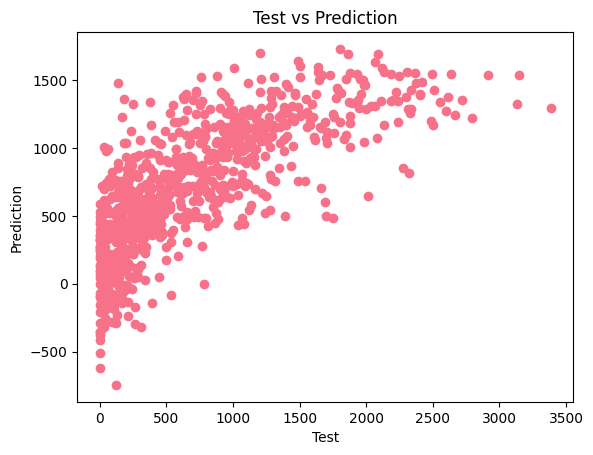

In [31]:
plt.scatter(y_test, y_pred)

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

### 1.2.2 Modelo preprocesado

Variables cíclicas

Si aplicaramos variables _Dummy_ o transformar con _One Hot Encoder_ a la fecha terminaríamos con 12 columnas para los meses, 7 columnas para los días de la semana y 24 columnas para la hora! En lugar de eso nos aprovecharemos de que todas estas variables son cíclicas, es decir, después de 23:00 hrs viene 00:00 hrs y el ciclo se vuelve a repetir, lo mismo para los meses del año y los días de la semana. Entonces podemos pensar en este ciclo como si fuera un _circulo_ utilizando el seno y el coseno de la fecha tenemos las coordenada de la fecha en el _circulo_. De esta forma las 23:00 y las 00:00 son cercanas en esta representación. Gracias a lo anterior nos quedamos con solo 2 columnas.

$\text{var_cos} = \cos(2π\; \text{var}/\text{periodo})$

$\text{var_sin} = \sin(2π\; \text{var}/\text{periodo})$

> a) ¿Por qué no simplemente usar solo el seno o solo el coseno?

En las funciones de seno y coseno, se tiene un ciclo en el cual todos los valores entre $x=\theta$ y $x=\theta+2π$ son los mismos. utilizar solo el seno y el coseno causa que no se utilice el ciclo y las distancias obtenidas entre cada variable serían incorrectas.

In [32]:
X_train['hour_sin'] = np.sin(2 * np.pi * X_train['Hour'] / 24)
X_train['hour_cos'] = np.sin(2 * np.pi * X_train['Hour'] / 24)
X_train['weekday_sin'] = np.sin(2 * np.pi * X_train['Dia'] / 7)
X_train['weekday_cos'] = np.cos(2 * np.pi * X_train['Dia'] / 7)
X_train['month_sin'] = np.sin(2 * np.pi * X_train['Mes'] / 12)
X_train['month_cos'] = np.cos(2 * np.pi * X_train['Mes'] / 12)

X_test['hour_sin'] = np.sin(2 * np.pi * X_test['Hour'] / 24)
X_test['hour_cos'] = np.sin(2 * np.pi * X_test['Hour'] / 24)
X_test['weekday_sin'] = np.sin(2 * np.pi * X_test['Dia'] / 7)
X_test['weekday_cos'] = np.cos(2 * np.pi * X_test['Dia'] / 7)
X_test['month_sin'] = np.sin(2 * np.pi * X_test['Mes'] / 12)
X_test['month_cos'] = np.cos(2 * np.pi * X_test['Mes'] / 12)

X_train.drop(['Dia', 'Mes', 'Hour'], axis=1, inplace=True)
X_test.drop(['Dia', 'Mes', 'Hour'], axis=1, inplace=True)

Estación

> b) Aplique la misma lógica de variable _cíclica_ a la variable _Season_.

In [33]:
X_train['Sin_Season'] = np.sin(2 * np.pi * X_train['Seasons'] / 4) 
X_train['Cos_Season'] = np.cos(2 * np.pi * X_train['Seasons'] / 4)
X_train.drop('Seasons', axis=1, inplace=True)

In [34]:
X_test['Sin_Season'] = np.sin(2 * np.pi * X_test['Seasons'] / 4) 
X_test['Cos_Season'] = np.cos(2 * np.pi * X_test['Seasons'] / 4)
X_test.drop('Seasons', axis=1, inplace=True)

Normalización de variables.

> c) Transforme las variables para que estas sigan una distribución normal con media 0 y varianza 1.



In [35]:
X_scaler = preprocessing.StandardScaler()
y_scaler = preprocessing.StandardScaler()


cols_to_normalize = ['Temperature(°C)', 
                     'Humidity(%)', 
                     'Wind speed (m/s)', 
                     'Visibility (10m)', 
                     'Dew point temperature(°C)', 
                     'Solar Radiation (MJ/m2)',
                     'Rainfall(mm)',
                     'Snowfall (cm)',
                     'Año']

X_train[cols_to_normalize] = X_scaler.fit_transform(X_train[cols_to_normalize])
y_train = y_scaler.fit_transform(np.array(y_train).reshape(-1, 1))

X_test[cols_to_normalize] = X_scaler.transform(X_test[cols_to_normalize])

> d) Utilice LinearRegression para entrenar el regresor y posteriormente obtener predicciones utilizando el testset.

In [36]:
reg = LinearRegression().fit(X_train, y_train)

> e) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [37]:
y_pred = reg.predict(X_test)

y_pred = y_scaler.inverse_transform(y_pred)

y_pred

array([[ 575.12390602],
       [  -6.05087904],
       [ 467.90119788],
       [ 831.96604068],
       [ 239.73913064],
       [ 175.42674983],
       [-126.87388072],
       [  64.33665725],
       [ 261.73409657],
       [ 652.10950301],
       [ 405.16321708],
       [ 553.34912314],
       [ 680.07020075],
       [ 887.160007  ],
       [ 480.188558  ],
       [1560.31950903],
       [ 783.29242608],
       [ 357.51782116],
       [ 410.14026063],
       [ 407.4542565 ],
       [1157.0699164 ],
       [ 413.12037745],
       [ 385.11620536],
       [ 725.02272359],
       [ 325.81518768],
       [ 697.49995771],
       [1005.26583874],
       [ 432.33123873],
       [-242.2082484 ],
       [ 681.56207489],
       [ 750.30169128],
       [1224.49593087],
       [ 718.28312369],
       [1213.70194509],
       [ 112.46286747],
       [ 267.38284371],
       [1586.79765751],
       [ 288.63718549],
       [ 222.01896237],
       [ 494.03835113],
       [ 822.86559043],
       [1156.783

> f) Calcule el error cuadrático medio en la escala original de bicicletas

In [38]:
mean_squared_error(y_test, y_pred)

183422.666524458

> g) ¿Mejoran los resultados con respecto al modelo entrenado sobre los datos en bruto?

> h) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

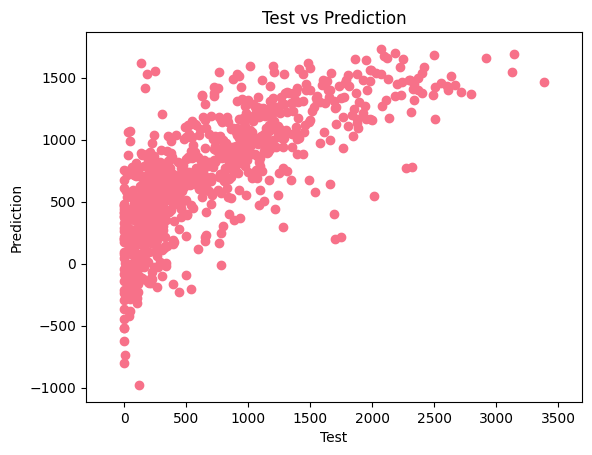

In [39]:
plt.scatter(y_test, y_pred)

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

### 1.2.3 Modelo SGD

En esta pregunta aplicaremos el modelo de regresión lineal utilizando el gradiente descendente estocástico (SGD), y para visualizar su rendimiento observaremos el error cuadrático medio a medida que el algoritmo SGD va iterando a través de las _epochs_. Para ello necesitamos separar una porción del conjunto de entrenamiento y así obtener el error de validación del modelo en ejemplos que no ha visto.

> a) Separe el conjunto de entrenamiento en un subconjunto de entrenamiento y uno de validación.

In [40]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25)

Utilize la librería _sklearn_ para entrenar el modelo a través _SGDRegressor_ y responda las siguientes preguntas:

> b) ¿Para qué sirve cada uno de los parametros que acepta _SGDRegressor_? Describa brevemente cada uno.

> c) Explique cuál es la función del parámetro alpha y compare, teóricamente, las variaciones de implementación del parámetro disponibles en el módulo, es decir, compare: _constant_ vs _optimal_ vs _invscaling_ vs _adaptive_.

In [41]:
reg = SGDRegressor(loss='squared_error', 
                   penalty=None,                    
                   tol=0.001, 
                   shuffle=True,                                                          
                   warm_start=True,
                   ...)
"""
Su código aquí
"""

SyntaxError: positional argument follows keyword argument (527308788.py, line 6)

Entrene el regresor SGD por 100 _epochs_ como máximo, utilizando *early_stoping* con un a paciencia de 10 _epochs_. Grafique el error cuadrático medio por epoca y responda las siguientes preguntas:

> d) ¿Para qué sirve el *early_stoping*?

> e) ¿Cómo se interpretan los resultados del entrenamiento según las curvas obtenidas?

> f) ¿Cuántas _epochs_ duró su entrenamiento?

In [ ]:
y_tr = np.asarray(y_tr).ravel()
y_test = np.asarray(y_test).ravel()

tr_errors, val_errors = [], []

# train the model using early stopping
n_epochs = 100
best_val_error = float('inf')
patience = 10  # stop tring if validation error doesn't improve after 10 epochs
epoch_since_best = 0
for epoch in range(n_epochs):
    
    reg.partial_fit(X_tr, y_tr)
    
    # collect the train and validation errors after each epoch
    y_tr_pred = reg.predict(X_tr)
    y_val_pred = reg.predict(X_val)
    tr_error = mean_squared_error(y_tr, y_tr_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    tr_errors.append(tr_error)
    val_errors.append(val_error)
    
    # check if validation error has improved
    if val_error < best_val_error:
        best_val_error = val_error
        epoch_since_best = 0
    else:
        epoch_since_best += 1
        if epoch_since_best >= patience:
            print(f"Stopping training after {epoch+1} epochs")
            break    

In [ ]:
plt.plot(tr_errors, label='train error')
plt.plot(val_errors, label='validation error')
plt.legend()
plt.show()

> g) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [ ]:
y_pred = reg.predict(X_test)

y_pred = y_scaler.inverse_transform(y_pred)

"""
Su código aquí
"""

> h) Calcule el error cuadrático medio en la escala original de bicicletas

In [ ]:
mean_squared_error(y_test, y_pred)

> i) ¿Mejoran los resultados con respecto al modelo anterior?

> j) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

In [ ]:
plt.scatter(y_test, y_pred)

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

## 1.3 Modelo con Regularización

### 1.3.1 Regularización Ridge y Lasso

Agregue regularización Ridge al modelo SGD y entrénelo por 100 _epochs_ como máximo, utilizando early_stoping con un a paciencia de 10 _epochs_. Grafique el error cuadrático medio por _epoch_ y responda las siguientes preguntas:

> a) ¿Qué son los llamados _hiperparámetros_ de un modelo y como se relacionan con el concepto de _hyper tuning_?

> b) ¿Cuál es la motivación de agregar una penalización al modelo?

> c) ¿De qué se compone la penalización mediante regularización Ridge?

> d) ¿Cómo funciona la regularización Lasso?

> e) ¿Cuáles son las ventajas y desventajas de usar regularización Ridge versus Lasso?

> f) Utilizando GridSearchCV optimize el hiperparámetro _learning rate_ para los valores 0.1, 0.01, 0.001.

> g) Pruebe con distintos tipos de _learning rate_ 'constant', 'optimal', 'invscaling'.

> h) Optimize también los hiperparámetros de coeficiente de regularización de l2 y l1 para los valores 0.0001, 0.001, 0.01.



> **Nota:** Investigue y lea la documentación de SGDRegressor, de KFold y de GridSearchCV antes de modificar y ejecutar el código, recuerde que el código presentado en el notebook es solo una guía de referencia y no necesariamente funciona, usted puede modificar su propio código y explicar su funcionamiento.

In [ ]:
k=5
cv_folds=KFold(n_splits=k, shuffle=True)

In [ ]:
reg = SGDRegressor(loss='squared_error', 
                   penalty='l2', # regularization therm
                   alpha=0.0001, # regularization coeficient
                   max_iter=100, #epochs
                   tol=0.001, 
                   shuffle=True,                                       
                   learning_rate='invscaling', # type of lr
                   eta0=0.01,    # learning rate coeficient
                   power_t=0.25                   
                   )

In [ ]:
param_grid = {'eta0': [0.1, 0.01, 0.001], 
              'penalty': ['l2', 'l1']
              'alpha': [0.0001, 0.001, 0.01],                
              'learning_rate': ['constant', 'optimal', 'invscaling']}

hypereg = GridSearchCV(reg, 
             param_grid, 
             scoring='neg_mean_squared_error',               
             refit=True, 
             cv=cv_folds, 
             verbose=0, 
            )

In [ ]:
hypereg.fit(X_train, y_train)

> i) Obtenga los resultados para cada hiperparámetro de la grilla.

In [ ]:
pd.DataFrame(hypereg.cv_results_)

> j) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [ ]:
y_pred = hypereg.predict(X_test)

y_pred = y_scaler.inverse_transform(y_pred)

"""
Su código aquí
"""

> k) Calcule el error cuadrático medio en la escala original de bicicletas

In [ ]:
mean_squared_error(...)

> l) ¿Mejoran los resultados con respecto a los modelo anteriores?

> m) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

In [ ]:
plt.scatter(y_test, y_pred)

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

## 1.4 Conclusiones:

(Escriba aquí sus conclusiones de la pregunta 1: Regresión lineal para la predicción de la demanda de bicicletas compartidas en Seúl)

# 2. Clasificación de hongos





La tarea de clasificación se refiere a un problema en el que se tiene un conjunto de datos y se quiere predecir la clase a la que pertenece cada elemento del conjunto de datos.

Para hacer esto, utilizaríamos un algoritmo de clasificación que examina las características de cada fruta en el conjunto de datos y aprende patrones que pueden ser utilizados para predecir su clase.

Hay muchos algoritmos de clasificación diferentes que se pueden utilizar en el aprendizaje automático, por ejemplo la regresión logística, el SVM (máquina de soporte vectorial), Random Forest y redes neuronales, etcétera.

Una vez que se entrena el modelo, se utiliza para predecir la clase de nuevos datos que no se incluyeron en el conjunto de datos original. Para medir el desempeño del modelo, se pueden utilizar diferentes métricas de evaluación, como la precisión, el recall y la F1-score.

La tarea de clasificación es muy útil en muchas áreas, como la medicina, la banca, el comercio electrónico y la publicidad, ya que permite la automatización de tareas que antes requerían una gran cantidad de tiempo y recursos humanos.

<center><img src=https://w0.peakpx.com/wallpaper/496/595/HD-wallpaper-red-mushroom-mushroom-red-beautiful.jpg></center>

Este conjunto de datos incluye descripciones de muestras correspondientes a 23 especies de hongos de la familia Agaricus y Hongo Lepiota extraídas de la Guía de campo de hongos norteamericanos de la Audubon Society. Cada especie se identifica como definitivamente comestible, definitivamente venenosa o de comestibilidad desconocida y no recomendada. Esta última clase se ha combinado con la venenosa.

## 2.1 Manipulación y exploración del conjunto de datos

In [3]:
import pandas as pd

In [1]:
!kaggle datasets download -d uciml/mushroom-classification

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!unzip mushroom-classification.zip

In [4]:
df = pd.read_csv('mushrooms.csv')

In [5]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
def datainfo():
    temp_ps = pd.DataFrame(index=df.columns)
    temp_ps['DataType'] = df.dtypes
    temp_ps["Non-null_Values"] = df.count()
    temp_ps['Unique_Values'] = df.nunique()
    temp_ps['NaN_Values'] = df.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(df))*100 
    return temp_ps

datainfo()

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
class,object,8124,2,0,0.0
cap-shape,object,8124,6,0,0.0
cap-surface,object,8124,4,0,0.0
cap-color,object,8124,10,0,0.0
bruises,object,8124,2,0,0.0
odor,object,8124,9,0,0.0
gill-attachment,object,8124,2,0,0.0
gill-spacing,object,8124,2,0,0.0
gill-size,object,8124,2,0,0.0
gill-color,object,8124,12,0,0.0


### 2.1.1 Exploración de features

> a) ¿Por qué la variable _veil-type_ no aporta ningún valor al entrenamiento? Grafique, justifique y elimine la columna.

Porque solo tiene un valor unico por lo cual no tiene ninguan variabilidad. Como todos los valores en la variable son iguales, no hay ninguna información que se pueda extraer de ella para distinguir entre diferentes clases de hongos.

<AxesSubplot: xlabel='veil-type', ylabel='count'>

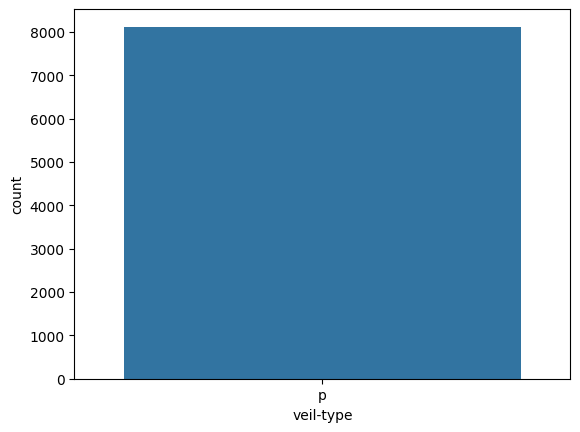

In [9]:
sns.countplot(x="veil-type", data=df)

In [10]:
df.drop('veil-type', axis=1, inplace=True)

> b) Grafique la distribución de cada variable

C:\Users\Gerson\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


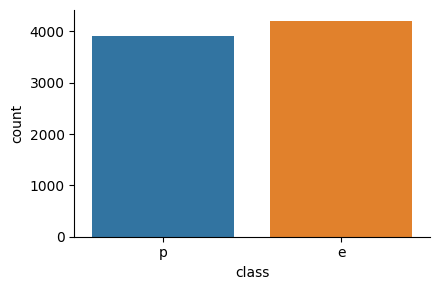

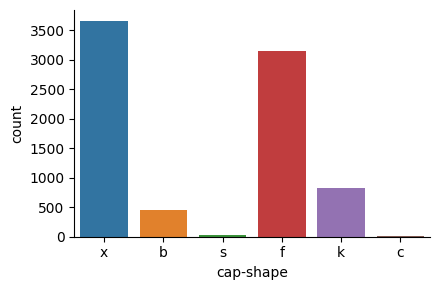

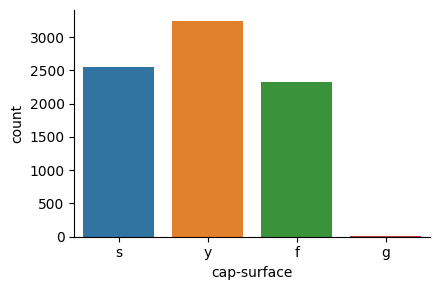

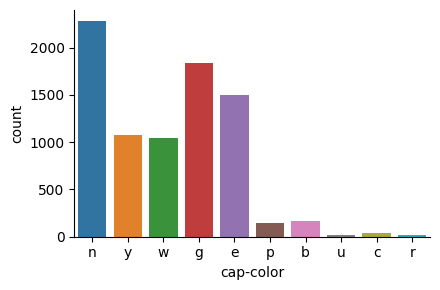

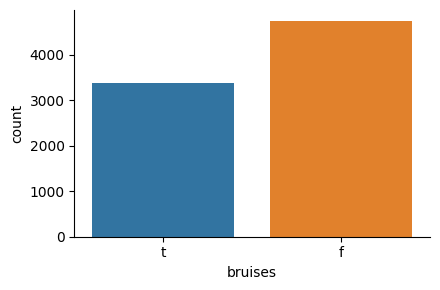

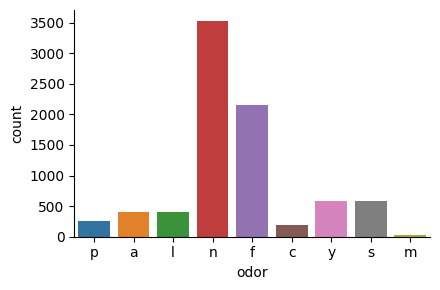

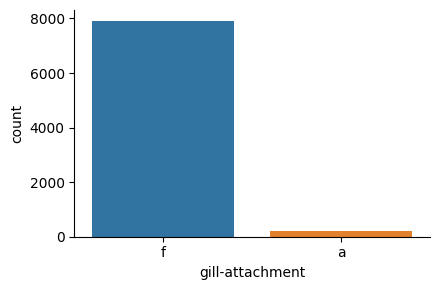

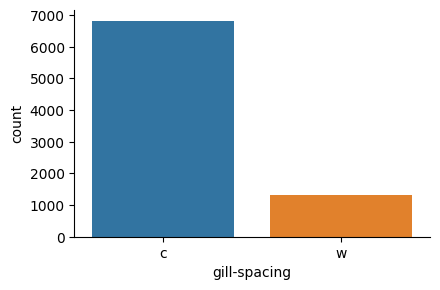

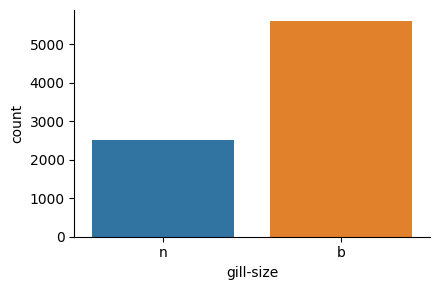

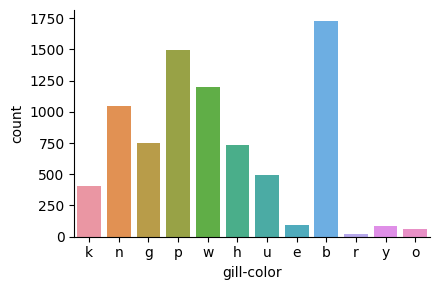

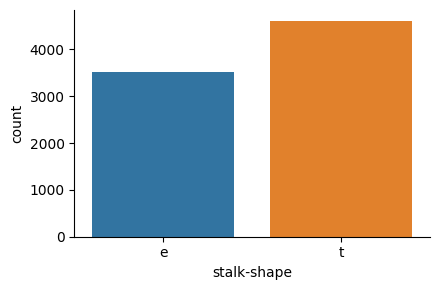

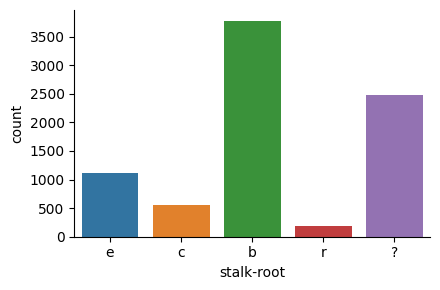

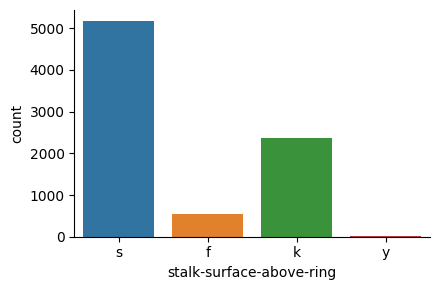

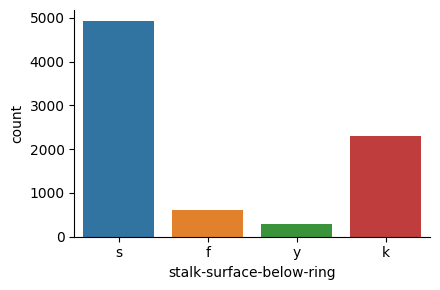

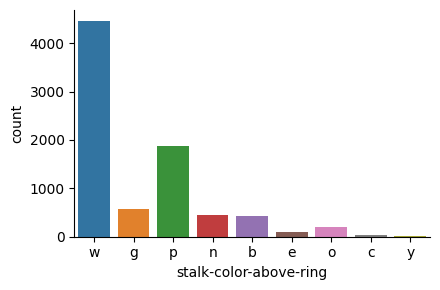

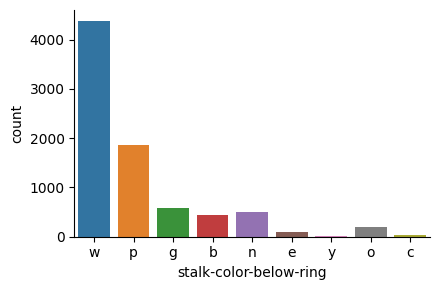

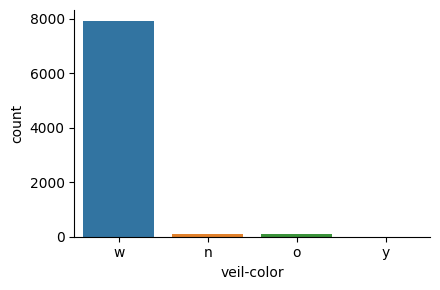

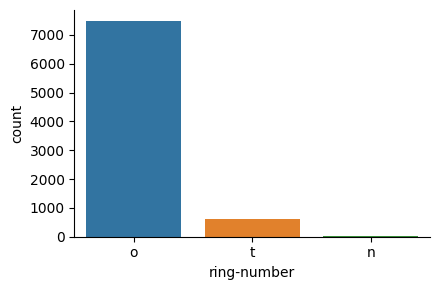

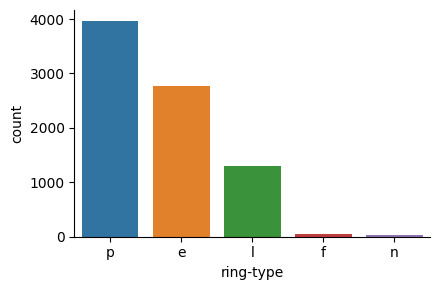

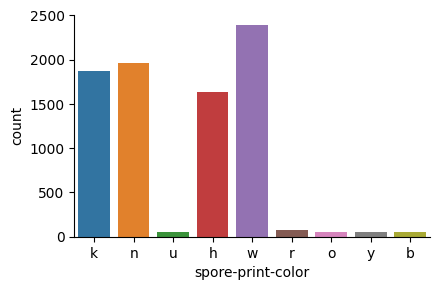

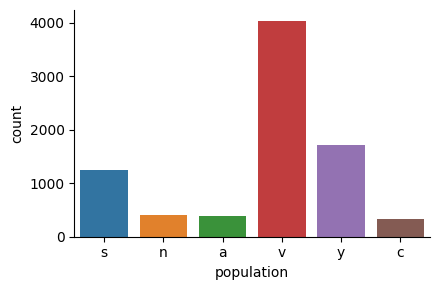

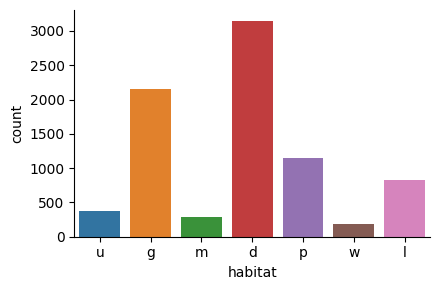

In [18]:
for col in df.columns:    
    sns.catplot(x=col, kind="count", data=df, height=3, aspect=1.5)

# Fuente: https://www.kaggle.com/code/itzsalil/starter-mushroom-classification-1a2d7941-1
# Distribution graphs (histogram/bar graph) of column data


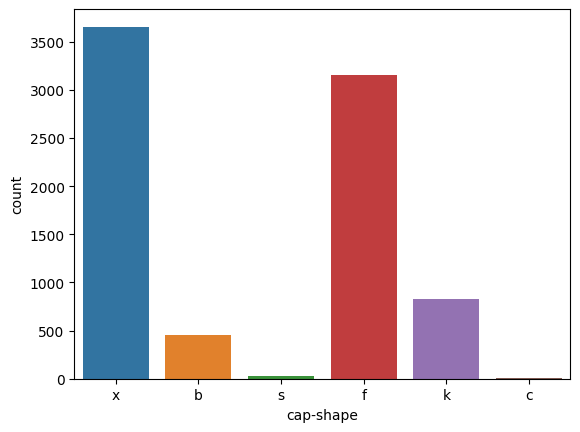

In [13]:
sns.countplot(x="cap-shape", data=df)
plt.show()

> c) Separe el conjunto de datos en los subconjuntos de entrenamiento y prueba.

In [19]:
X=df.drop('class',axis=1)
y=df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

> d) Codifique las variables de entrada para que puedan ser trabajadas en las siguientes preguntas.

In [20]:
from sklearn.calibration import LabelEncoder

#Fuente: https://www.kaggle.com/code/nitinchan/mushroom-classification-rf-features-encodings
sample_1 = X.copy()
label = LabelEncoder()
for col in sample_1.columns:
    sample_1[col] = label.fit_transform(sample_1[col])
# Print Updated Data
sample_1.head(10)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
5,5,3,9,1,0,1,0,0,5,0,...,2,2,7,7,2,1,4,2,2,1
6,0,2,8,1,0,1,0,0,2,0,...,2,2,7,7,2,1,4,2,2,3
7,0,3,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,3,3
8,5,3,8,1,6,1,0,1,7,0,...,2,2,7,7,2,1,4,2,4,1
9,0,2,9,1,0,1,0,0,2,0,...,2,2,7,7,2,1,4,2,3,3


In [21]:
X = sample_1

> e) Separe los subconjuntos en _X_ e _y_

In [22]:
# load data and split into train/test sets
train_set = df.sample(frac=0.7, random_state=42)
test_set = df.drop(train_set.index)

# create a list to store the columns to be dropped
drop_cols = []

# iterate over columns and check for binary variables
for col in train_set.columns:
    if len(train_set[col].unique()) == 2:
        # convert binary variables to 0/1
        train_set[col] = pd.factorize(train_set[col])[0]
        test_set[col] = pd.factorize(test_set[col])[0]
    else:
        # get dummies for categorical variables with more than 2 categories
        train_set = pd.concat([train_set, pd.get_dummies(train_set[col], prefix=col)], axis=1)
        test_set = pd.concat([test_set, pd.get_dummies(test_set[col], prefix=col)], axis=1)
        # add the original column to the list of columns to be dropped
        drop_cols.append(col)

# drop the original categorical columns from the train and test sets
train_set.drop(drop_cols, axis=1, inplace=True)
test_set.drop(drop_cols, axis=1, inplace=True)

# ensure that the train and test sets have the same columns
train_set, test_set = train_set.align(test_set, join='outer', axis=1, fill_value=0)

# print the shapes of the train and test sets
print('Train set shape:', train_set.shape)
print('Test set shape:', test_set.shape)


Train set shape: (5687, 112)
Test set shape: (2437, 112)


In [23]:
X_train = train_set.drop('class', axis=1)
y_train = train_set['class']
X_test = test_set.drop('class', axis=1)
y_test = test_set['class']

### 2.1.2 Principal Component Analisis

PCA (Principal Component Analysis) es una técnica de reducción de dimensionalidad comúnmente usada en machine learning para reducir el número de características en el conjunto de datos conservando la información más importante.

> a) Aplique PCA a los datos preprocesados para reducir el número de características a un conjunto más pequeño de componentes principales que capturen los patrones más importantes de los datos. Pruebe con n_components = n_features - k, donde k={1,10,50}, es decir, cree 3 posibles transformaciones de "*X_train*" y apliquelas sobre "*X_test*".

**Nota:** En adelante se le llamará "representación de los datos" a las distintas _feature selection/extraction_, por ejemplo: una posible representación de los datos es aplicar PCA con las 80 componentes principales.

In [ ]:
pca = PCA(n_components=#n_features - {1,10,50}
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

"""
Su código aquí
"""

### 2.1.3 Mutual Information

La información mutua es una medida de dependencia entre variables, se puede usar para medir el grado de asociación entre las _features_ y el _target_, y usar esta información para seleccionar las _features_ más relevantes para posteriormente realizar la clasificación. Al utilizar la información mutua para seleccionar las características más informativas, puede mejorar potencialmente el rendimiento de su modelo de aprendizaje automático reduciendo la cantidad de información irrelevante o redundante en el conjunto de datos.

> a) Calcule la información mutua entre cada característica y la variable objetivo (comestible o venenoso) para medir el grado de asociación entre cada característica y la variable objetivo.

> b) Seleccione las n características con las puntuaciones de información mutua más altas como entrada para un modelo de aprendizaje automático. Pruebe con n = n_features - k, para k={1,10,50}, es decir, cree 3 posibles transformaciones de "X_train" y apliquelas sobre "X_test".





In [ ]:
mi =mutual_info_classif(X_train, y_train)

In [ ]:
# set k to the number of features you want to exclude
k = 1, 10, 50

for i in k:
  # compute the number of features to select
  n = len(mi) - i

  # get the indices of the features sorted by mutual information score
  sorted_indices = np.argsort(mi)

  # select the top n features
  selected_indices = sorted_indices[-n:]

  ...
  """
  Su código aquí
  """

## 2.2 Modelos de clasificación

Primero entrenaremos el modelo Naïve Bayes con los conjuntos de datos de entrenamiento generados en el punto 2.1, luego entrenaremos otros clasificadores utilizando como conjunto de entrenamiento la mejor representación de los datos según las metricas de clasificación obtenidas con el modelo Naïve Bayes.

### 2.2.1 Naïve Bayes

Naïve Bayes es un modelo generativo clásico para la clasificación en el aprendizaje automático. En el contexto de la clasificación de hongos, puede utilizar Naïve Bayes para modelar la distribución de probabilidad de cada característica dada la etiqueta de clase (comestible o venenosa) y utilizar la regla de Bayes para calcular la probabilidad posterior de cada etiqueta de clase dadas las características observadas.

Al utilizar Naïve Bayes para la clasificación, se puede conseguir un buen rendimiento con cantidades relativamente pequeñas de datos de entrenamiento y modelos relativamente sencillos. Sin embargo, Naïve Bayes asume que las características son condicionalmente independientes dada la etiqueta de clase, lo que puede no ser cierto en la práctica. No obstante, Naïve Bayes puede ser un modelo _baseline_ útil para comparar con modelos más complejos.

Dado el conjuntos de entrenamiento con características observadas, se utiliza la regla de Bayes para calcular la probabilidad a posteriori de cada etiqueta de clase dadas las características observadas. La etiqueta de clase con la probabilidad a posteriori más alta sería la etiqueta de clase predicha para la muestra de hongos.

Si consideramos que $P(x_1, \dots, x_n)$ es constante, entonces:

\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y).\end{aligned}\end{align}

Usted deberá utilizar la estimación Máxima A Posteriori (MAP) para estimar $P(y)$ y $P(x_i \mid y)$, donde $P(y)$ es la frecuancia relativa de la clase $y$ y $P(x_i \mid y)$ asumiremos que se distribuye de forma Gaussiana, es decir:

\begin{align}\begin{aligned}P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)\end{aligned}\end{align}

> a) ¿Qué otras distribuciones de probabilidad se pueden asumir para este problema considerando los valores posibles de las _features_ y del target en el conjunto de datos? Nombre mínimo 2.

Para las preguntas b) y c) considere que los datos siguen una distribución de probabilidad Gaussiana y entrene el clasificador utilizando el módulo _GaussianNB_ de la librería _sklearn_.

> b) Entrene e clasificador Naïve Bayes con los datos en _bruto_, es decir, tal cual como vienen, sin haber aplicado ninguna extracción o selección de características.

> c) Entrene e clasificador Naïve Bayes con cada una de las representaciones obtenidas en el punto 2.1.

In [ ]:
clf = GaussianNB()
clf.fit(X_train_..., y_train_...)

y_pred = clf.predict(X_test_...)

"""
Su códig aquí
"""

> d) Para cada representación de los datos del punto 2.1, obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [ ]:
print(classification_report(y_test_..., y_pred, labels=['edible', 'poisonous'], ...))

> e) Determine la mejor representación de los datos según las metricas obtenidas en la pregunta anterior y utilice esa representación de aquí en adelante para entrenar a los otros clasificadores.

> f) Muestre los errores tipo 1 y tipo 2.

In [ ]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_true, y_pred)  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[fp, fn], [tn, tp]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Type 1', 'Type 2'], yticklabels=['Type 1', 'Type 2'])


### 2.2.2 Linear Discriminant Analisis

El análisis discriminante lineal (LDA) es un algoritmo clásico de clasificación lineal, y su objetivo es encontrar una combinación lineal de características que maximice la separación entre las dos clases (setas comestibles y venenosas). En otras palabras, el LDA intenta proyectar los datos en un espacio de menor dimensión, preservando al mismo tiempo la mayor discriminación de clases posible.

La etiqueta de clase con la media más cercana en el espacio transformado sería la etiqueta de clase predicha para la muestra de setas.

> a) ¿Qué es lo que asume el modelo LDA sobre la distribución condicional de las clases?

> b) ¿Qué es lo que asume el modelo LDA sobre las matrices de covarianza de la distribución condicional?

> c) Entrene este clasificador con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

In [ ]:
clf = LinearDiscriminantAnalysis(n_components=)
clf.fit(X_train_..., y_train_...)

y_pred = clf.predict(X_test_...)

"""
Su códig aquí
"""

> d) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [ ]:
print(classification_report(y_test_..., y_pred, labels=['edible', 'poisonous'], ...))

> e) Muestre los errores tipo 1 y tipo 2.

In [ ]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_true, y_pred)  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[fp, fn], [tn, tp]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Type 1', 'Type 2'], yticklabels=['Type 1', 'Type 2'])


### 2.2.3 Regresión logística

La regresión logística es un modelo discriminativo de clasificación clásico que puede utilizarse para la clasificación de hongos. El objetivo de la regresión logística es encontrar el modelo lineal que mejor se ajuste y que pueda predecir la probabilidad de que cada muestra de hongo pertenezca a una clase determinada (comestible o venenosa).

> a) ¿En qué consiste la estimación de máxima verosimilitud de coeficientes?

> b) ¿Qué asume este modelo de la relación entre las características y la variable objetivo?

> c) ¿Qué se hace para evitar el sobreajuste de este modelo?

> d) Entrene este clasificador con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

**Nota:** Usted puede variar o probar con distintos hiperparámetros siempre y cuando se utilizen de forma correcta el modelo y los datos para que pueda obtener predicciones comparables con los otros modelos. Puede basarse en los hiperparámetros probados con el regresor logistico y en la documentación de la librería.

In [ ]:
clf = LogisticRegression(...)
clf.fit(X_train_..., y_train_...)

y_pred = clf.predict(X_test_...)

"""
Su códig aquí
"""

> e) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [ ]:
print(classification_report(y_test_..., y_pred, labels=['edible', 'poisonous'], ...))

> f) Muestre los errores tipo 1 y tipo 2.

In [ ]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_true, y_pred)  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[fp, fn], [tn, tp]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Type 1', 'Type 2'], yticklabels=['Type 1', 'Type 2'])


### 2.2.4 Support Vector Machines

Las máquinas de vectores soporte (SVM) son un algoritmo de aprendizaje automático potente y versátil que puede utilizarse para la clasificación de hongos. La idea principal detrás de SVM es encontrar el hiperplano que mejor separa las diferentes clases en el conjunto de datos.

Utilice los datos de entrenamiento para ajustar un modelo SVM a los datos. Esto implica encontrar el hiperplano que maximice el margen entre las muestras positivas y negativas. El margen es la distancia entre el hiperplano y las muestras más cercanas de cada clase.

Si los datos no se pueden separar linealmente, utilice funciones de kernel para transformar los datos en un espacio de mayor dimensión en el que se puedan separar. Las funciones kernel más comunes incluyen funciones polinómicas, de base radial (RBF) y sigmoidales.

Entrene un clasificador SVM con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

Entrene el clasificador con los siguientes tipos de _kernel_:

> a) Lineal, con 2 valores del coeficiente gamma distintos.

> b) Polinómico, con 2 valores del coeficiente gamma distintos.

> c) rbf, con 2 valores del coeficiente gamma distintos.

In [ ]:
clf = NuSVC(kernel={'linear', 'poly', 'rbf'}, gamma=...)
clf.fit(X_train_..., y_train_...)

y_pred = clf.predict(X_test_...)

"""
Su códig aquí
"""

> d) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [ ]:
print(classification_report(y_test_..., y_pred, labels=['edible', 'poisonous'], ...))

> e) Muestre los errores tipo 1 y tipo 2.

In [ ]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_true, y_pred)  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[fp, fn], [tn, tp]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Type 1', 'Type 2'], yticklabels=['Type 1', 'Type 2'])


## 2.3 Conclusiones:

(Escriba aquí sus conclusiones de la pregunta 2: Clasificación de hongos)